<a href="https://colab.research.google.com/github/SantiagoMorenoV/Position-vs-Salaries/blob/main/Python/Pos_Salaries_Polynomial_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Did the interviewee tell the truth?**

An HR recruiter wants to know if a candidate told the truth or not about his salary in his previous position. 

For this case, I have a dataset with the positions and salaries from the company where the candidate used to work.

# **Importing the libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Importing the dataset**

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/SantiagoMorenoV/Position-vs-Salaries/main/Position_Salaries.csv?token=GHSAT0AAAAAACAGCYI67EQ4C5YEIZO6TGKMZBKIN4A')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# **Plotting Data to see if it is linear or maybe it is more like a polynomial**

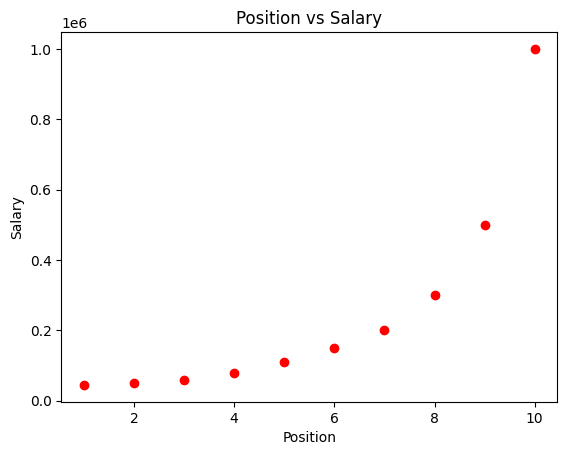

In [4]:
plt.scatter(X, y, color='red')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Position vs Salary')
plt.show()

## **Descriptive Statistics**

In [5]:
print("\n\033[1m\033[36m\033[6m{:^50}\033[0m".format("Descriptive Statistics"))
print(dataset.describe().round(2))


              Descriptive Statistics              
       Level      Salary
count  10.00       10.00
mean    5.50   249500.00
std     3.03   299373.88
min     1.00    45000.00
25%     3.25    65000.00
50%     5.50   130000.00
75%     7.75   275000.00
max    10.00  1000000.00


# Salary distribution

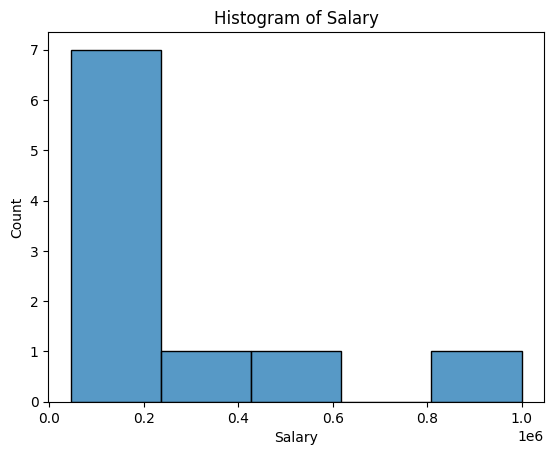

In [6]:
# Selecting our variables
variables = ["Salary"]

# Creating histograms
for var in variables: 
  sns.histplot(data = dataset, x = var)
  plt.title("Histogram of {}".format(var))
  plt.show()

## **Salary boxplot**

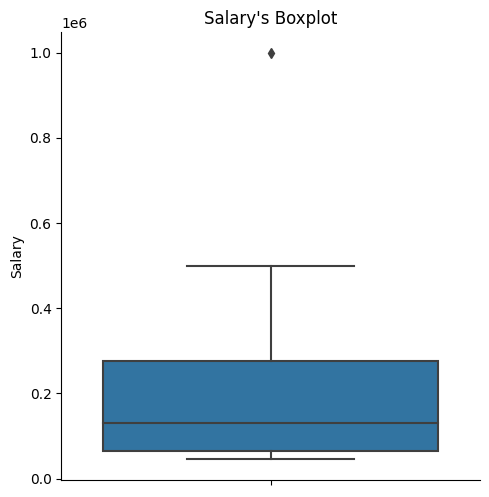

In [7]:
for var in variables:
    sns.catplot(data = dataset, y = var, kind = "box") 
    plt.title("{}'s Boxplot".format(var)) 
    plt.show()

# **Linear or Polynomial Regression?**

For academic purposes, I will estimate a linear and a polynomial model to check which of these two would be a better fit for the data.

# **Fitting a Linear Regression to the dataset**

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## **Visualising the Linear Regression results**

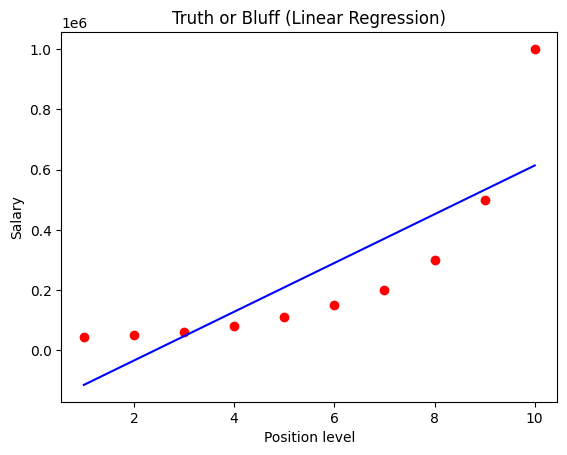

In [9]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Since the data looks more like a polynomial, a linear model would not be accurate for this problem, as many actual data points are far from the linear regression predictions.

#  **Fitting a Polynomial Regression to the dataset**

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## **Visualising the Polynomial Regression results**

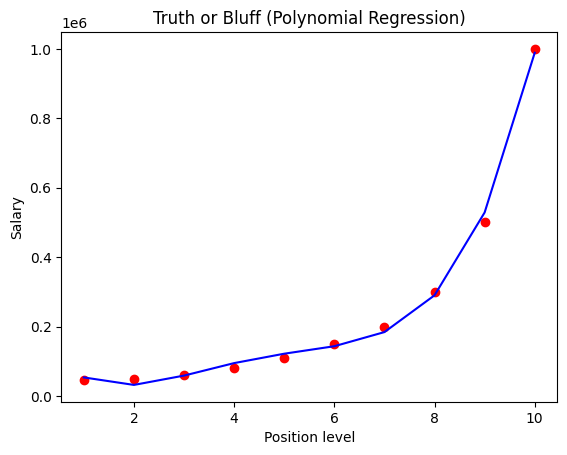

In [11]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

You must be wondering why there is some overfitting here. Remember that our business problem requires us to obtain the closest prediction. Thus, the candidate was right about his salary expectations or not, provided that he was a regional manager in his previous company and had been working in that position for two years, so he was in the range of 6th to 7th position level.

## **Visualizing the Polynomial Regression Results (for higher resolution and smoother curve)**

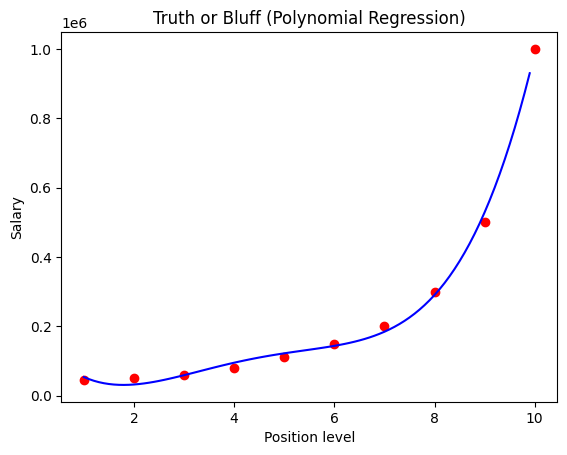

In [12]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# **Predicting the salary**

The business problem asserts that the recruiter searched for the candidate's information and found he was a Regional Manager in his previous company and had been working in this position for two years, so a 6.5 positional level will be used for predicting his former salary and check if he was telling the truth.

**Predicting the salary with a Linear Regression**

In [13]:
lin_reg.predict([[6.5]])

array([330378.78787879])

**Predicting the salary with a Polynomial Regression**

In [14]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

### **Comparing both predictions**

Here I have compared both estimations by using a table. Firstly, I created a dictionary that includes the Polynomial and Linear regression predictions. Then I converted both predictions to decimals so the table is later displayed with two decimals (this is optional). After that, I implemented a pandas data frame and, finally, printed the comparative table. 

In [15]:
# Creating a dictionary with predicted values
salary_pred = {'Polynomial': [lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))], 
             'Linear': [lin_reg.predict([[6.5]])]}
# Converting values to decimals
salary_pred = {k: [round(float(v[0]), 2)] for k, v in salary_pred.items()}
# Creating a Dataframe with the predicted data (salary) and table titles
df = pd.DataFrame(salary_pred, columns=['Polynomial', 'Linear'], index=['Salary Prediction'])
print('Polynomial vs Linear Salary Prediction')
print(df)    

Polynomial vs Linear Salary Prediction
                   Polynomial     Linear
Salary Prediction   158862.45  330378.79


**Determination coefficient-Polynomial model**

In [16]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X))
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
r2

0.9973922891706614

# **Discussion**

For this business problem, a Polynomial Regression is more accurate than a Linear one. 

Once evaluated that the previous position of the candidate was Regional Manager, he had been working in that role for two years, and also that once gotten data from the previous company, it was possible to classify him as an intermediate-level in the 6-7 range or between Regional Manager and Partner. In other words, a 6.5 position level.

The Polynomial model predicted that this candidate had a salary of USD 158,862.45, close to his answer, USD 160K per year. In conclusion, the statistical evidence showed that he was telling the truth.